In [12]:
'''
Author: Namruth and Aisha(Some part of the code is reused from lab1)
'''
import numpy as np
import matplotlib.pyplot as plt

'''
Common values for all modulation techniques
'''
samp_rate = 2000000  #2M 
bitrate =  2703.288   # 4 times the symbol rate shown in the inspectrum signal screenshot

carr_freq = 434000000 # Hz

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]


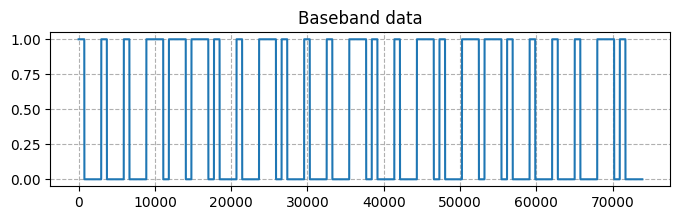

In [13]:
fig = plt.figure(figsize=(8,2))

message_bits = [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]
message_bits2 = []

for i in range(len(message_bits)):
    if message_bits[i] == 0:
        message_bits2.append(1)
        message_bits2.append(0)
        message_bits2.append(0)
        message_bits2.append(0)
    
    else:
        message_bits2.append(1)
        message_bits2.append(1)
        message_bits2.append(1)
        message_bits2.append(0)

# Each symbol contains 4 bits 
# this processs is done so that the bits extracted from the signal are converted to the same format as the transmitter signal.        
print(message_bits2)


baseband_data = np.kron(message_bits2, np.ones(int(samp_rate / bitrate))) # 1 bit = sample_rate/bitrate

plt.plot(baseband_data )
plt.title("Baseband data")
plt.grid(True, linestyle='--')

73900


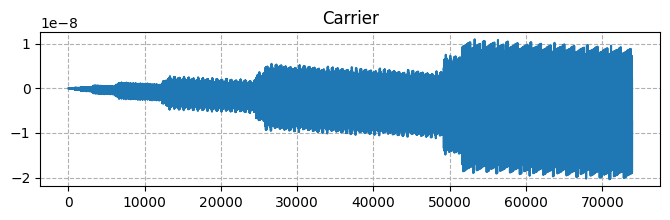

In [3]:
c_samples = np.arange( len(baseband_data))
print(len(c_samples))

carrier = np.sin(2*np.pi*carr_freq*c_samples/samp_rate)

fig = plt.figure(figsize=(8,2))
plt.plot(carrier)
plt.title("Carrier")
plt.grid(True, linestyle='--')

[ 0.00000000e+00 -1.31309372e-13 -2.62618744e-13 ... -0.00000000e+00
 -0.00000000e+00  0.00000000e+00]
73900


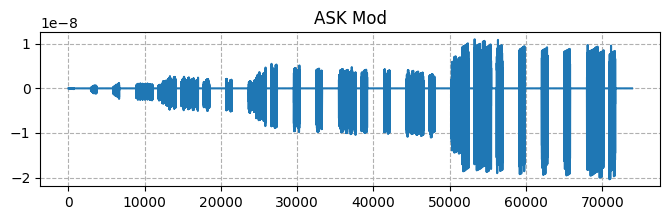

In [9]:
ask_mod = carrier * baseband_data
print(ask_mod)
print(len(ask_mod))
fig = plt.figure(figsize=(8,2))
plt.plot(ask_mod)
#plt.plot(baseband_data)
plt.title("ASK Mod")
plt.grid(True, linestyle='--')

In [14]:
ask_mod.tofile("sig_test.dat")


# we then write the modulated signal into a dat file which is used in the grc source